<a href="https://colab.research.google.com/github/ZoubirCHATTI/08_Machin_Learning/blob/main/03_MNIST_images_classification/MNIST_Images_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of MNIST dataset images**
This project focuses on building and evaluating a Deep Learning model to solve a fundamental problem in computer vision: handwritten digit classification. We'll utilize the MNIST (Modified National Institute of Standards and Technology) dataset, which is often considered the "Hello World" of Deep Learning due to its accessibility and role in benchmarking classification algorithms.The dataset consists of 60,000 training images and 10,000 test images, each being a $28 \times 28$ pixel grayscale image of a handwritten digit (from $0$ to $9$). The objective is to train a deep neural network model DNN to accurately map each image input to its corresponding numerical label (the true content of the image). The success of this classification model will demonstrate basic proficiency in image processing and neural network construction.

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
#Loading data
(train_data, train_labels), (temp_data, temp_labels)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The image contains the number: 9


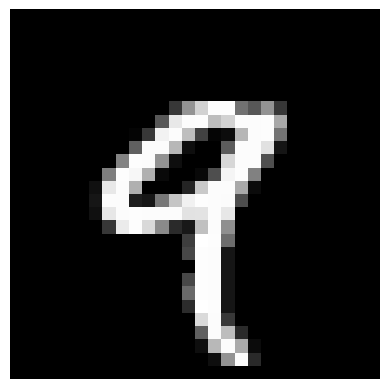

In [15]:
#Displaying example image
plt.figure()
plt.imshow(train_data[4], cmap='gray')
plt.axis(False)
print(f"The image contains the number: {int(train_labels[4])}")

In [9]:
#Splitting data to test and valisation datasets
X_test, X_val, Y_test, Y_val=train_test_split(temp_data, temp_labels, test_size=0.2)

In [11]:
#Checking test and valoidation datasets shapes
print(f"Validation dataset shape: {X_val.shape}")
print(f"\nTest dataset shape: {X_test.shape}")

Validation dataset shape: (2000, 28, 28)

Test dataset shape: (8000, 28, 28)


In [5]:
#Falttening the input to be compatible with DNN requirements
train_data=train_data.reshape(60000, 28*28)
X_test=X_test.reshape(8000, 28*28)
X_val=X_val.reshape(2000, 28*28)

In [6]:
#Defining a function that transforms the labels dataset to a binary matrix
def to_one_hot (sequence, dimension):
  results=np.zeros((len(sequence), dimension))
  for i, seq in enumerate(sequence):
    results[i , seq]=1
  return results

In [7]:
#Transforming the label datasets to bianary matrices
train_labels_vec=to_one_hot(train_labels, 10)
Y_test_vec=to_one_hot(Y_test, 10)
Y_val_vec=to_one_hot(Y_val, 10)

In [8]:
#Mounting the DNN model
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Defining the stop criterion
early_stop=EarlyStopping(monitor='val_loss', patience=2 )

In [10]:
 #Running  the model training
history=model.fit(train_data, train_labels_vec, epochs=10, batch_size=128,validation_data=(X_val, Y_val_vec), callbacks=[early_stop])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8421 - loss: 2.0710 - val_accuracy: 0.9495 - val_loss: 0.1750
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9636 - loss: 0.1109 - val_accuracy: 0.9520 - val_loss: 0.1313
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9769 - loss: 0.0508 - val_accuracy: 0.9655 - val_loss: 0.0828
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9828 - loss: 0.0323 - val_accuracy: 0.9655 - val_loss: 0.0787
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9869 - loss: 0.0226 - val_accuracy: 0.9595 - val_loss: 0.0778
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9897 - loss: 0.0172 - val_accuracy: 0.9655 - val_loss: 0.0695
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9896 - loss: 0.0168 - val_accuracy: 0.9700 - val_loss: 0.0657
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9899 - loss: 0.0177 - val_accuracy: 0

In [11]:
#Evaluation of the model performance
loss, accuracy=model.evaluate(X_test, Y_test_vec)
print(f"test loss: {loss:.3f}")
print(f"test accuracy: {accuracy*100:.3f}%")

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9654 - loss: 0.0710
test loss: 0.066
test accuracy: 96.637%


In [12]:
#Extracting model evaluation parameters
history_dict=history.history
train_loss=history_dict['loss']
val_loss=history_dict['val_loss']
train_acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
epochs=range(1, len(train_loss)+1)

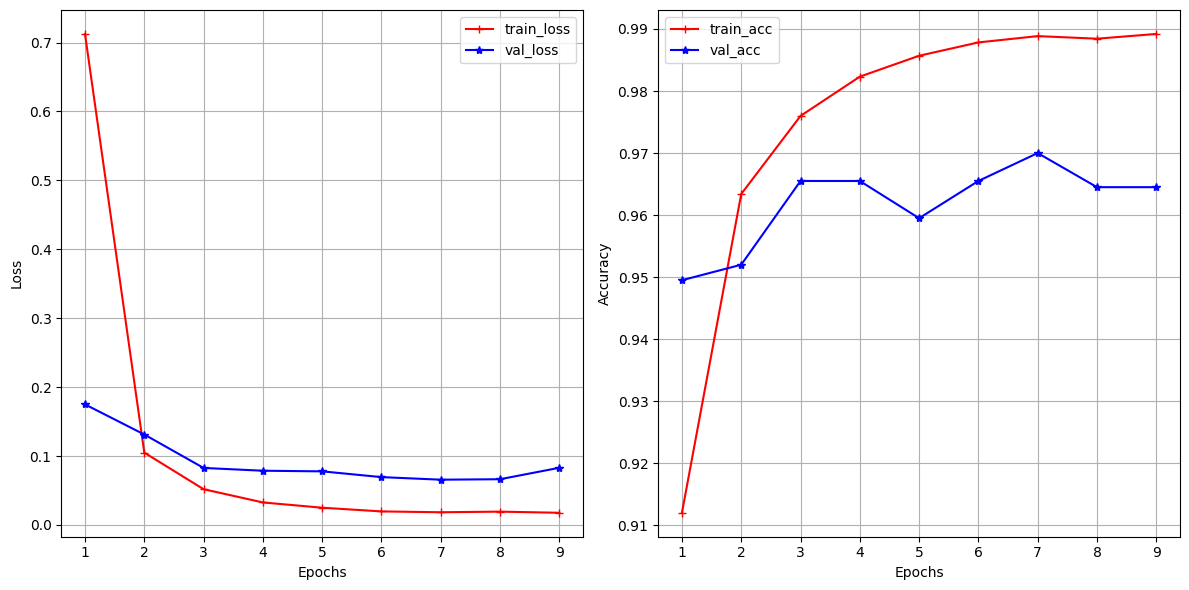

In [13]:
#Displaying loss and accuracy aginst epochs
plt.figure(figsize=(12 ,6))
plt.subplot(1 , 2 , 1)
plt.plot(epochs, train_loss, marker='+', color='r', label='train_loss')
plt.plot(epochs, val_loss, marker='*', color='b', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.subplot(1 , 2 , 2)
plt.plot(epochs, train_acc, marker='+', color='r', label='train_acc')
plt.plot(epochs, val_acc, marker='*', color='b', label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [14]:
#Comparing with random assignment
import copy
Y_test_vec_copy=copy.deepcopy(Y_test_vec)
np.random.shuffle(Y_test_vec_copy)
compare=np.array(Y_test_vec)== Y_test_vec_copy
print(f"Random accuracy={compare.mean()*100:.2f}%\nModel accuracy={accuracy*100:.2f}% ")

Random accuracy=81.96%
Model accuracy=96.64% 
